In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from itertools import cycle
filename="depthdata.bin" #this data set is an extremely short video recorded with a hand held d435
height=480
width=848
cycol = cycle('bgrcmk') #here I'm generating a list of colors I can plot

In [2]:
frames = np.fromfile(filename, dtype=np.uint16) #A highly efficient way of reading binary data with a known data-type, as well as parsing simply formatted text files. Data written using the tofile method can be read using this function.
reshaped = frames.reshape(-1, height, width) #.reshape simply restructures data into dimensions of your choosing. -1 means find the number of segments that structures the data into the dimnesions shown afterwards

In [3]:
!wc -c depthdata.bin #this is a unix command to get the number of bytes in a binary file. Because our data is uint16, each pixel is two bytes

 135137280 depthdata.bin


In [4]:
print(reshaped.shape) #returns the shape of the data. First number is number of frames
#note that the nubmers below are one greater than the actual indices that exist
#there is no reshaped[number_of_frames,height,width], the last frame is reshaped[number_of_frames-1,height-1,width-1]

(166, 480, 848)


In [5]:
number_of_frames=reshaped.shape[0] #set number of frames equal to the first element in reshaped.shape

In [6]:
print(reshaped[100,100,100]) #print a pixel located at 100,100 in the 100th frame

282


In [7]:
#Here I create np.array containing the value of a single pixel over all the frames of the data
#first, I choose a pixel
rand_height=random.randint(0,height-1) #random pixel's height is between 1 and the height of the video
rand_width=random.randint(0,width-1) #random pixel's width is between 1 and the width of the video

#pixel_values_over_time=np.zeros([number_of_frames]) #first I create an empty array of zeros
pixel_values_over_time=[]
for a_frame in range(0,number_of_frames): #the for loop starts at the first index and goes until for the number of frames
    current_pixel_value=reshaped[a_frame,rand_height,rand_width] #the current pixel is equal to the value fo reshaped at the frame number specified by the loop and at the pixel location specified by random.randomint
    pixel_values_over_time=np.append(pixel_values_over_time,current_pixel_value) #append the current pixel value to empty pixel_values_over_time array
    
print(rand_height,rand_width)
print(pixel_values_over_time)

440 470
[532. 533. 534. 532. 531. 533. 532. 533. 532. 533. 534. 533. 533. 533.
 532. 530. 532. 533. 533. 533. 531. 532. 532. 532. 532. 533. 531. 533.
 529. 531. 534. 531. 531. 533. 531. 532. 531. 531. 531. 531. 530. 531.
 531. 531. 532. 532. 531. 531. 532. 530. 533. 531. 531. 530. 530. 532.
 533. 532. 534. 534. 533. 533. 531. 533. 532. 533. 533. 532. 533. 533.
 534. 534. 533. 533. 533. 533. 532. 532. 534. 533. 534. 536. 537. 537.
 538. 535. 535. 532. 534. 536. 538. 536. 535. 536. 538. 536. 536. 536.
 538. 539. 536. 538. 536. 538. 537. 537. 538. 534. 535. 536. 535. 536.
 537. 538. 535. 537. 536. 536. 537. 537. 537. 538. 537. 537. 534. 536.
 539. 538. 539. 538. 535. 540. 538. 539. 538. 541. 538. 537. 538. 539.
 539. 535. 537. 538. 538. 537. 536. 536. 537. 536. 536. 535. 536. 536.
 535. 536. 532. 538. 537. 537. 536. 534. 536. 534. 536. 535.]


In [8]:
print(pixel_values_over_time.size) #use size instead of shape because it's one dimensional.

166


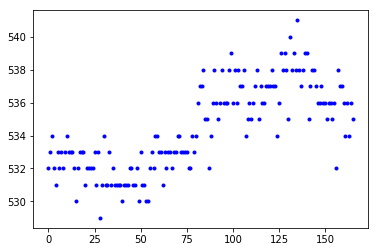

In [9]:
plt.plot([range(0,pixel_values_over_time.size)],[pixel_values_over_time],'b.') #plotting the pixel over time
plt.show() #showing the plot 

In [10]:
#now let's say I want to look at how much the pixel deviated from it's starting position.
#I want to subtract all values of in the array by the value in the first position in the array.

In [11]:
change_in_pixel_values_over_time=pixel_values_over_time-pixel_values_over_time[0]

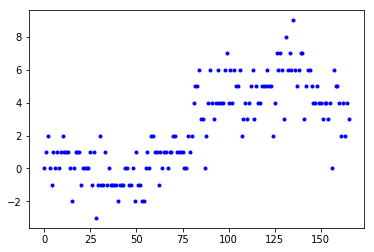

In [12]:
plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],'b.') #plotting the pixel over time
plt.show() #showing the plot 

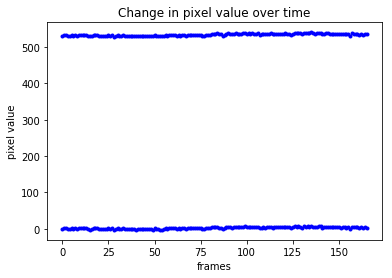

In [13]:
#LOOK HOW EASY IT IS TO PUT TWO THINGS ON THE SAME PLOT (and add basic labels)
plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],'b.') #plotting the pixel over time
plt.plot([range(0,pixel_values_over_time.size)],[pixel_values_over_time],'b.') #plotting the pixel over time
plt.xlabel('frames')
plt.ylabel('pixel value')
plt.title('Change in pixel value over time')
plt.show() #showing the plot 

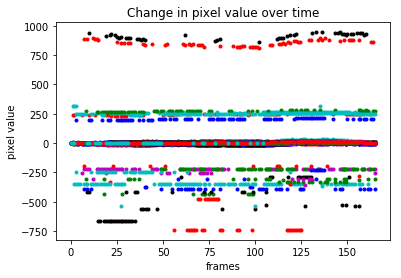

In [14]:
#Now I want to plot SEVERAL the pixels over time
number_of_pixels_I_want_to_plot=100;
for n in range(0,number_of_pixels_I_want_to_plot):
    rand_height=random.randint(0,height-1) #random pixel's height is between 1 and the height of the video
    rand_width=random.randint(0,width-1) #random pixel's width is between 1 and the width of the video

    #pixel_values_over_time=np.zeros([number_of_frames]) #first I create an empty array of zeros
    pixel_values_over_time=[]
    for a_frame in range(0,number_of_frames): #the for loop starts at the first index and goes until for the number of frames
        current_pixel_value=reshaped[a_frame,rand_height,rand_width] #the current pixel is equal to the value fo reshaped at the frame number specified by the loop and at the pixel location specified by random.randomint
        pixel_values_over_time=np.append(pixel_values_over_time,current_pixel_value) #append the current pixel value to empty pixel_values_over_time array
        change_in_pixel_values_over_time=pixel_values_over_time-pixel_values_over_time[0]
    plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],marker='.',linestyle='-',color=next(cycol)) #plotting the pixel over time for some reason plotting the line doesnt work, only plotting the . or + works
plt.xlabel('frames')
plt.ylabel('pixel value')
plt.title('Change in pixel value over time')
plt.show()
